In [1]:
import os
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

os.chdir('/Users/xiaodanxu/Documents/SynthFirm.nosync/BayArea_GIS/registration')

plt.style.use('ggplot')
sns.set(font_scale=1.2)  # larger font

In [2]:
# Load data for analysis
ca_private_fleet = read_csv('CA_private_fleet_size_distribution_V2.csv')
ca_for_hire_fleet = read_csv('CA_for_hire_fleet_size_distribution_V2.csv')
ca_for_lease_fleet = read_csv('CA_for_lease_fleet_size_distribution_V2.csv')

tx_private_fleet = read_csv('TX_private_fleet_size_distribution_V2.csv')
tx_for_hire_fleet = read_csv('TX_for_hire_fleet_size_distribution_V2.csv')
tx_for_lease_fleet = read_csv('TX_for_lease_fleet_size_distribution_V2.csv')

In [3]:
# generate identifiable attribute
ca_private_fleet.loc[:, 'state'] = 'CA'
ca_private_fleet.loc[:, 'fleet'] = 'private'

ca_for_hire_fleet.loc[:, 'state'] = 'CA'
ca_for_hire_fleet.loc[:, 'fleet'] = 'for-hire'

ca_for_lease_fleet.loc[:, 'state'] = 'CA'
ca_for_lease_fleet.loc[:, 'fleet'] = 'for-lease'

tx_private_fleet.loc[:, 'state'] = 'TX'
tx_private_fleet.loc[:, 'fleet'] = 'private'

tx_for_hire_fleet.loc[:, 'state'] = 'TX'
tx_for_hire_fleet.loc[:, 'fleet'] = 'for-hire'

tx_for_lease_fleet.loc[:, 'state'] = 'TX'
tx_for_lease_fleet.loc[:, 'fleet'] = 'for-lease'

fleet_analysis = pd.concat([ca_private_fleet, ca_for_hire_fleet, ca_for_lease_fleet,
                           tx_private_fleet, tx_for_hire_fleet, tx_for_lease_fleet])
fleet_analysis.head(5)

,fleet_size,total_carriers,total_trucks,total_truck_std,DIESEL Vocational HDV,DIESEL Tractor HDV,DIESEL Vocational MDV,GAS Vocational MDV,min_size,avg_truck_per_carrier,fraction_of_carrier,state,fleet
0,0-2,59260,71568.0,0.406865,0.169014,0.177523,0.492902,0.160561,1,1.207695,0.740852,CA,private
1,3-5,11663,43020.0,0.777897,0.204579,0.235007,0.451255,0.109159,3,3.688588,0.145808,CA,private
2,6-10,4898,36603.0,1.360709,0.238095,0.266645,0.403519,0.091741,6,7.473050,0.061233,CA,private
3,11-50,3655,70954.0,8.869176,0.280421,0.285861,0.354187,0.079530,11,19.412859,0.045694,CA,private
4,51-100,308,21071.0,13.173440,0.313559,0.305444,0.293626,0.087371,51,68.412338,0.003851,CA,private


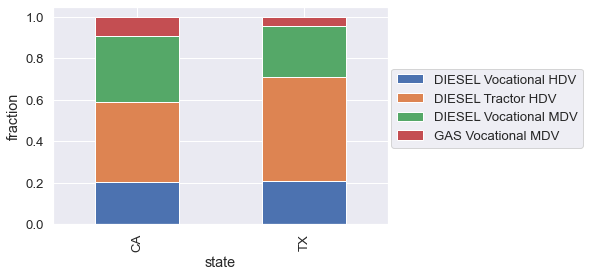

In [4]:
fleet_analysis.loc[:, 'DIESEL Vocational HDV count'] = fleet_analysis.loc[:, 'total_trucks'] * \
fleet_analysis.loc[:, 'DIESEL Vocational HDV']

fleet_analysis.loc[:, 'DIESEL Tractor HDV count'] = fleet_analysis.loc[:, 'total_trucks'] * \
fleet_analysis.loc[:, 'DIESEL Tractor HDV']

fleet_analysis.loc[:, 'DIESEL Vocational MDV count'] = fleet_analysis.loc[:, 'total_trucks'] * \
fleet_analysis.loc[:, 'DIESEL Vocational MDV']

fleet_analysis.loc[:, 'GAS Vocational MDV count'] = fleet_analysis.loc[:, 'total_trucks'] * \
fleet_analysis.loc[:, 'GAS Vocational MDV']

grouping_var = ['total_trucks', 'DIESEL Vocational HDV count',
               'DIESEL Tractor HDV count', 'DIESEL Vocational MDV count',
               'GAS Vocational MDV count']
truck_count = fleet_analysis.groupby(['state'])[grouping_var].sum()
# truck_count = truck_count.reset_index()


truck_count.loc[:, 'DIESEL Vocational HDV'] = truck_count.loc[:, 'DIESEL Vocational HDV count'] / \
truck_count.loc[:, 'total_trucks']

truck_count.loc[:, 'DIESEL Tractor HDV'] = truck_count.loc[:, 'DIESEL Tractor HDV count'] / \
truck_count.loc[:, 'total_trucks']

truck_count.loc[:, 'DIESEL Vocational MDV'] = truck_count.loc[:, 'DIESEL Vocational MDV count'] / \
truck_count.loc[:, 'total_trucks']

truck_count.loc[:, 'GAS Vocational MDV'] = truck_count.loc[:, 'GAS Vocational MDV count'] / \
truck_count.loc[:, 'total_trucks']

truck_count[['DIESEL Vocational HDV', 'DIESEL Tractor HDV',
            'DIESEL Vocational MDV', 'GAS Vocational MDV']].plot.bar(stacked=True)
plt.legend(loc=(1.01,.35)) #here I tried to keep it outside middle right
plt.ylabel('fraction')

plt.savefig('plot/total_vehicle_composition_by_state.png', dpi = 200,
           bbox_inches = 'tight')

In [5]:
truck_count

,total_trucks,DIESEL Vocational HDV count,DIESEL Tractor HDV count,DIESEL Vocational MDV count,GAS Vocational MDV count,DIESEL Vocational HDV,DIESEL Tractor HDV,DIESEL Vocational MDV,GAS Vocational MDV
state,,,,,,,,,
CA,452477.0,92439.0,173594.0,144768.0,41676.0,0.204295,0.383653,0.319946,0.092106
TX,329492.0,67970.0,166452.0,80549.0,14521.0,0.206287,0.505178,0.244464,0.044071


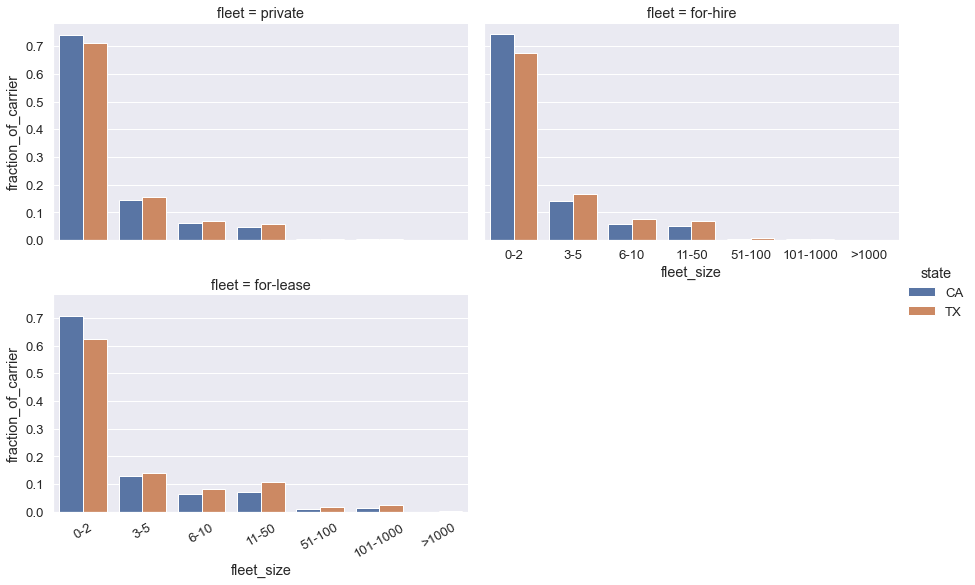

In [9]:
# fleet composition by region
sns.catplot(data = fleet_analysis, x = 'fleet_size', y = 'fraction_of_carrier',
            hue = 'state', col = 'fleet', col_wrap = 2, 
            height = 4, aspect = 1.6, kind = 'bar')
plt.xticks(rotation = 30)
plt.savefig('plot/fleet_composition_compare.png', dpi = 200)

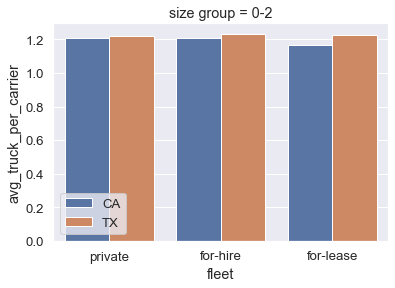

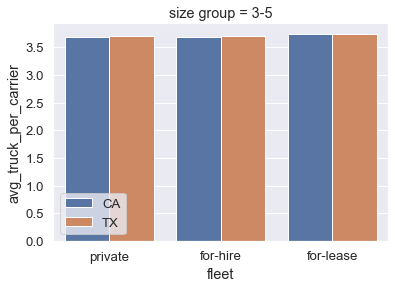

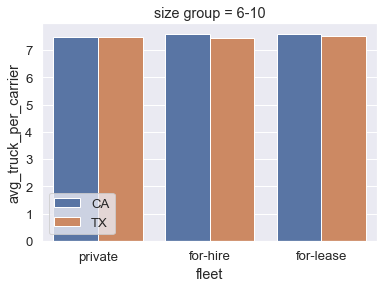

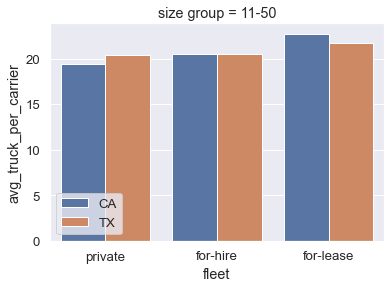

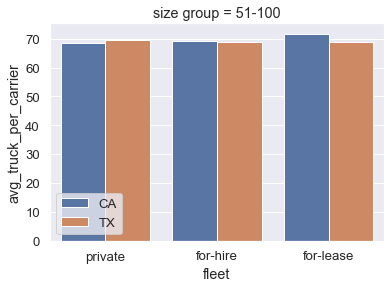

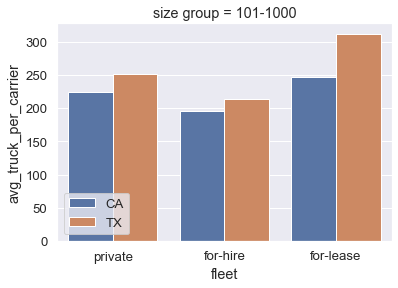

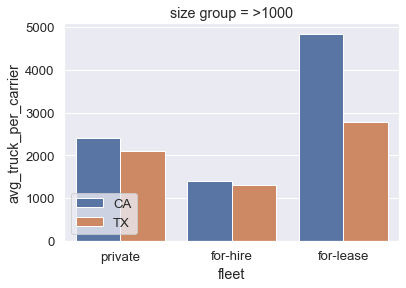

In [17]:
# fleet composition by region
fleet_size_group = fleet_analysis.fleet_size.unique()
for fg in fleet_size_group:
    fleet_analysis_to_plot = fleet_analysis.loc[fleet_analysis['fleet_size'] == fg]
    sns.barplot(data = fleet_analysis_to_plot, x = 'fleet', y = 'avg_truck_per_carrier',
            hue = 'state', ci=None)
    plt.title('size group = ' + fg)
    plt.legend(loc = 3)
    plt.savefig('plot/avg_veh_comparison_' + fg + '.png', dpi = 200) 
    plt.show()
#     plt.xticks(rotation = 30)
#     g.set_yscale("log")
#     plt.savefig('plot/fleet_size_by_group_compare.png', dpi = 200)

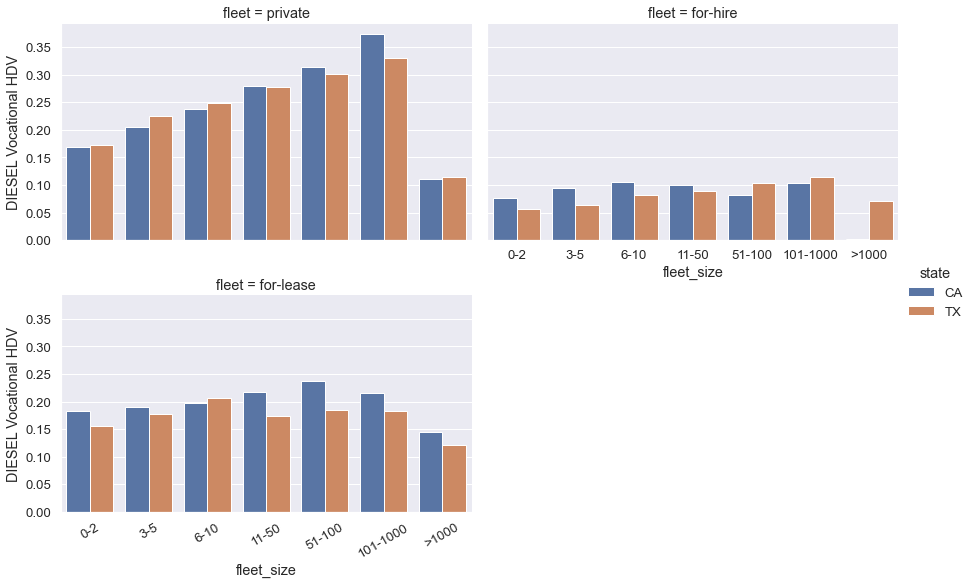

In [18]:
# fleet composition by region
sns.catplot(data = fleet_analysis, x = 'fleet_size', y = 'DIESEL Vocational HDV',
            hue = 'state', col = 'fleet', col_wrap = 2, 
            height = 4, aspect = 1.6, kind = 'bar')
plt.xticks(rotation = 30)
plt.savefig('plot/diesel_vocational_hdv_compare.png', dpi = 200)

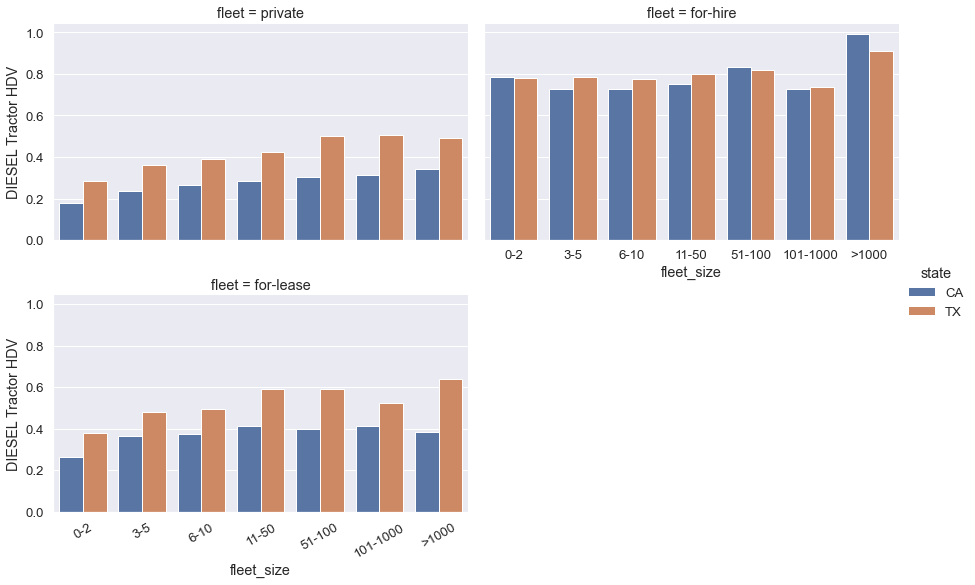

In [19]:
# fleet composition by region
sns.catplot(data = fleet_analysis, x = 'fleet_size', y = 'DIESEL Tractor HDV',
            hue = 'state', col = 'fleet', col_wrap = 2, 
            height = 4, aspect = 1.6, kind = 'bar')
plt.xticks(rotation = 30)
plt.savefig('plot/diesel_tractor_hdv_compare.png', dpi = 200)

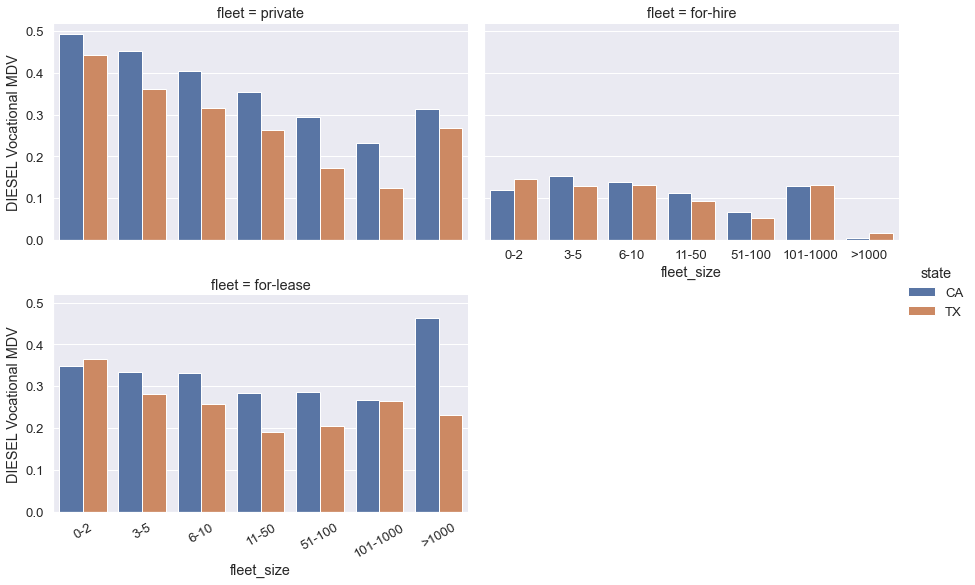

In [20]:
# fleet composition by region
sns.catplot(data = fleet_analysis, x = 'fleet_size', y = 'DIESEL Vocational MDV',
            hue = 'state', col = 'fleet', col_wrap = 2, 
            height = 4, aspect = 1.6, kind = 'bar')
plt.xticks(rotation = 30)
plt.savefig('plot/diesel_vocational_mdv_compare.png', dpi = 200)

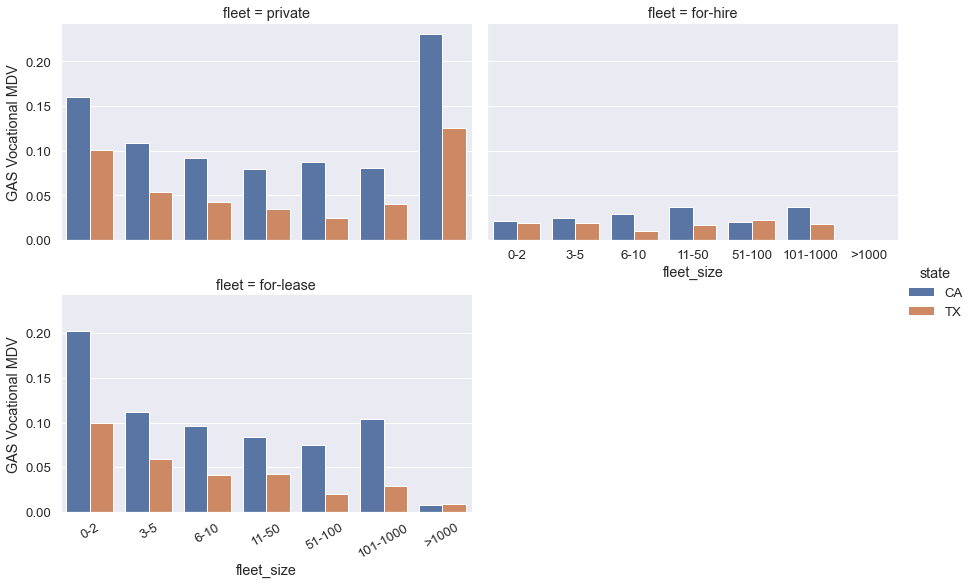

In [21]:
# fleet composition by region
sns.catplot(data = fleet_analysis, x = 'fleet_size', y = 'GAS Vocational MDV',
            hue = 'state', col = 'fleet', col_wrap = 2, 
            height = 4, aspect = 1.6, kind = 'bar')
plt.xticks(rotation = 30)
plt.savefig('plot/gasoline_vocational_mdv_compare.png', dpi = 200)